# MNIST
Scikit-learn provides many helper funcitons to download popular datasets. MNIST is one of them.

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Datasets loaded by Scikit-Learn generally have similar dictionary structure including:
- A **DESCR** key describing the dataset.
- A **data** key containing the an array with one row per instance and one column per feature
- A **target** key containing an array with the label

In [10]:
X, y = mnist['data'], mnist.target
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

There are 70000 images, and each image has 784 features. This is because each image is 28\*28 pixels, and each feature simply represents one pixel's intensity, from 0(white) to 255(black).

Now let's take a peek at one digit from the dataset.

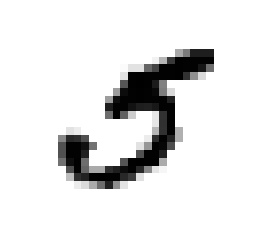

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [13]:
y[36000]

5.0

You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset is actually already split into a training set(the first 60000 images) and a test set(the last 10000 images).

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

**Shuffle the training set now. **

This will guarantee that all cross-validation folds will be similar. Moreover, some learning algorithms are sensitive to the order tof the training instances, and they perform poorly if they get many similar instances in a row. 

In [16]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier
Let's simplify the problem for now and only try to identify one digit - for example, the number 5. This will be an example of a *binary classifier*, capable of distinguishing between just 2 classes, 5 or not-5.

In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)

In [18]:
y_train_5[:5]

array([False, False, False, False, False])

Now let's pick a classifier and train it. A good place to start is with a **Stochastic Gradient Descent(SGD)** classifier, using **SGDClassifier** class. 

**This classifier has the advantage of being capabel of handling very large datasets efficiently.** This is in part because SGD deals with training instances independently, one at a time(which makes SGD well suited for online learning).

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])

array([False])

It seems that SGD is wrong this time. But it's ok.
# Performance Measure
Evaluating a classifier is often significantly trickier than evaluating a regressor.

## Measuring Accuracy Using Cross-validation
Let's use the `cross_val_score()` function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds.

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([0.96505, 0.9636 , 0.96435])

Wow! Above 96% accuracy(ratio of correct predictions) on all cv folds. 

Well, before you get too excited, let's look at a very dumb classifier that just classifies every single image in the "not-5" class:

In [23]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [26]:
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91105, 0.9085 , 0.9094 ])

So if we always guess that the image is not a 5, we will be right about 90% of the time.

This demonstrates why accuracy is generally not preferred performance measure for calssifers, especially when you are dealing with *skewed datasets*(i.e., when some classes are much more frequent than others)

## Confusion Matrix
The general idea of confusion matrix is to count the number of times instances of class A are classified as class B.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You can make predictions on the test set, but let's it untouched for now.

In [27]:
from sklearn.model_selection import  cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53903,   676],
       [ 1464,  3957]])

**Each row in a confusion matrix represents an actual class, while each column represent a predicted class.**

The first row of this matrix considers non-5 images(the negative class):53903 of them were classified as non-5s(**true negatives**), while the remaining 1307 were classified as 5s(**false positives**). Same in 2nd row: **false negatives and true positives**.

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal.(主对角线）

In [29]:
confusion_matrix(y_train_5 , y_train_5)

array([[54579,     0],
       [    0,  5421]])